In [7]:
import numpy as np
import pandas as pd
import requests
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import joblib
import EyeScreen
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('https://cos.drbrain.net/profile/tj/2023/9/21/25efef47-caa6-4820-8617-4dac133c1231.txt')
df

,timestamp,level,x,y,z,pitch,yaw,roll
0,1695264485835,0,-0.17,0.00,-0.86,9.43,10.61,358.35
1,1695264485861,0,0.00,0.00,0.00,9.67,359.49,358.27
2,1695264485889,0,0.00,0.00,0.00,9.78,359.12,358.21
3,1695264485917,0,0.00,0.00,0.00,9.83,358.77,358.22
4,1695264485946,0,0.00,0.00,0.00,9.82,358.45,358.20
...,...,...,...,...,...,...,...,...
3049,1695264572134,13,-0.09,-0.11,1.79,6.60,296.92,359.30
3050,1695264572160,13,-0.09,-0.11,1.80,6.09,296.56,358.37
3051,1695264572186,13,-0.09,-0.11,1.82,5.48,296.19,357.31
3052,1695264572212,13,-0.09,-0.12,1.83,4.84,296.07,356.09


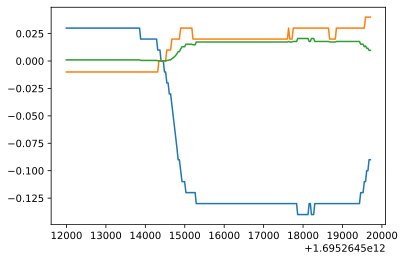

In [32]:
forward = df[(df['level'] == 1) | (df['level'] == 2)]
forward['vel'] = forward['y'] ** 2 + forward['z'] ** 2
plt.plot(forward['timestamp'], forward['y'])
plt.plot(forward['timestamp'], forward['z'])
plt.plot(forward['timestamp'], forward['vel'])

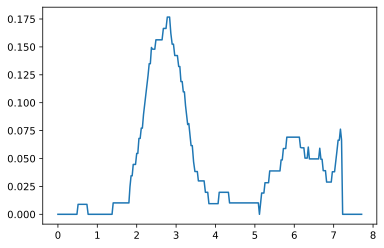

In [50]:
def vel(row):
    dist = math.sqrt(row['x'] ** 2 + row['y'] ** 2 + row['z'] ** 2)
    vel = dist / row['timestamp']
    return vel
# 1
df_action = df.loc[(df['level'] == 1) | (df['level'] == 2)]
df_action['timestamp'] = (df_action['timestamp'] - df_action['timestamp'].min())/1000
diff = df_action[['timestamp', 'x', 'y', 'z']].diff()
df_action['vel'] = diff.apply(lambda x: vel(x), axis=1)
df_action['vel'] = df_action['vel'].rolling(35, center=True).mean()
df_action['vel'].fillna(0, inplace=True)

plt.plot(df_action['timestamp'], df_action['vel'])

In [26]:
df_action['vel'].rolling(3, center=True).mean()

906          NaN
907          NaN
908     0.000000
909     0.000000
910     0.000000
          ...   
1166    0.330220
1167    0.219109
1168    0.229885
1169    0.114943
1170         NaN
Name: vel, Length: 265, dtype: float64

In [ ]:
import Cervical
cervical = Cervical.Cervical("https://cos.drbrain.net/profile/tj/2023/9/21/25efef47-caa6-4820-8617-4dac133c1231.txt", 1)


In [2]:
with requests.get('https://cos.drbrain.net/profile/tj/2023/2/17/4148663f-1e5c-41c5-964d-a46c9a7a8b56.txt') as r:
    txt = r.text

es = EyeScreen.EyeScreen(txt, '男', '高中', '29')

In [3]:
data = es.preprocess_feat(es.text2DF())

In [4]:
es.predict(data)

(20.903225806451612, 26.479591836734695)

In [5]:
# list(np.array(es.cog_score(data))[0])
es.cog_score(data)

[71.44702842377261,
 5.1919788590082385,
 4.2761319172722185,
 80.6323506949748,
 79.40968789718966,
 62.41662788894059,
 38.876233864844345,
 6.994712103407755,
 10.014409221902017,
 5.0]